# Optimizing fixed policies for continuous-time system

In [1]:
from rl4caribou import CaribouScipy as carib
from rl4caribou.agents import constAction

import numpy as np
import pandas as pd
from plotnine import ggplot, aes, geom_point, geom_ribbon, geom_density, geom_line
import polars as pl
from skopt import gp_minimize, gbrt_minimize
from skopt.plots import plot_objective, plot_convergence

In [45]:
import ray

@ray.remote
def gen_ep_rew(manager, env):
    episode_reward = 0.0
    observation, _ = env.reset()
    for t in range(env.Tmax):
        action, _ = manager.predict(observation)
        observation, reward, terminated, done, info = env.step(action)
        episode_reward += reward
        if terminated or done:
            break
    return episode_reward

def gather_stats(manager, env, N=200, return_ep_rewards=False):
    results = ray.get(
        [gen_ep_rew.remote(manager, env) for _ in range(N)]
    )
    ray.shutdown()
    # results = [gen_ep_rew(manager, env) for _ in range(N)]
    #
    if return_ep_rewards:
        return results
    y = np.mean(results)
    sigma = np.std(results)
    ymin = y - sigma
    ymax = y + sigma
    return y, ymin, ymax 

In [3]:
# pacifist = constAction(mortality_vec=np.array([0.0,0.0,0.0]))
# gather_stats(pacifist, carib())

In [4]:
CONFIG = {}

def g(x):
    manager = constAction(x)
    out = gather_stats(manager, carib(config=CONFIG))
    return - out[0]

In [16]:
%%time
res = gp_minimize(
    g, 
    [(0.0, 1.0), (0.0, 1.0), (0.0, 1.0)], 
    n_calls = 50, 
    verbose=True,
)
res.fun, res.x

Iteration No: 1 started. Evaluating function at random point.


2024-05-20 18:35:28,931	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.2761
Function value obtained: 854.4719
Current minimum: 854.4719
Iteration No: 2 started. Evaluating function at random point.


2024-05-20 18:35:36,220	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 2 ended. Evaluation done at random point.
Time taken: 7.2402
Function value obtained: 807.4576
Current minimum: 807.4576
Iteration No: 3 started. Evaluating function at random point.


2024-05-20 18:35:43,438	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 3 ended. Evaluation done at random point.
Time taken: 7.3030
Function value obtained: 690.1642
Current minimum: 690.1642
Iteration No: 4 started. Evaluating function at random point.


2024-05-20 18:35:51,794	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 4 ended. Evaluation done at random point.
Time taken: 8.3079
Function value obtained: 1011.0399
Current minimum: 690.1642
Iteration No: 5 started. Evaluating function at random point.


2024-05-20 18:35:59,077	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 5 ended. Evaluation done at random point.
Time taken: 7.6676
Function value obtained: 425.6824
Current minimum: 425.6824
Iteration No: 6 started. Evaluating function at random point.


2024-05-20 18:36:06,866	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 6 ended. Evaluation done at random point.
Time taken: 7.8028
Function value obtained: 824.5336
Current minimum: 425.6824
Iteration No: 7 started. Evaluating function at random point.


2024-05-20 18:36:14,615	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 7 ended. Evaluation done at random point.
Time taken: 7.4041
Function value obtained: 478.3516
Current minimum: 425.6824
Iteration No: 8 started. Evaluating function at random point.


2024-05-20 18:36:21,976	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 8 ended. Evaluation done at random point.
Time taken: 7.5963
Function value obtained: 945.0113
Current minimum: 425.6824
Iteration No: 9 started. Evaluating function at random point.


2024-05-20 18:36:29,588	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 9 ended. Evaluation done at random point.
Time taken: 7.3435
Function value obtained: 952.3377
Current minimum: 425.6824
Iteration No: 10 started. Evaluating function at random point.


2024-05-20 18:36:36,936	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 10 ended. Evaluation done at random point.
Time taken: 7.6181
Function value obtained: 682.9579
Current minimum: 425.6824
Iteration No: 11 started. Searching for the next optimal point.


2024-05-20 18:36:44,629	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 11 ended. Search finished for the next optimal point.
Time taken: 7.8691
Function value obtained: 616.3808
Current minimum: 425.6824
Iteration No: 12 started. Searching for the next optimal point.


2024-05-20 18:36:52,464	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 12 ended. Search finished for the next optimal point.
Time taken: 8.1113
Function value obtained: 442.6618
Current minimum: 425.6824
Iteration No: 13 started. Searching for the next optimal point.


2024-05-20 18:37:00,564	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 13 ended. Search finished for the next optimal point.
Time taken: 7.8246
Function value obtained: 428.3955
Current minimum: 425.6824
Iteration No: 14 started. Searching for the next optimal point.


2024-05-20 18:37:08,359	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 14 ended. Search finished for the next optimal point.
Time taken: 7.8876
Function value obtained: 481.3296
Current minimum: 425.6824
Iteration No: 15 started. Searching for the next optimal point.


2024-05-20 18:37:16,256	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 15 ended. Search finished for the next optimal point.
Time taken: 8.0396
Function value obtained: 406.1676
Current minimum: 406.1676
Iteration No: 16 started. Searching for the next optimal point.


2024-05-20 18:37:24,308	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 16 ended. Search finished for the next optimal point.
Time taken: 7.9728
Function value obtained: 377.4997
Current minimum: 377.4997
Iteration No: 17 started. Searching for the next optimal point.


2024-05-20 18:37:32,352	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 17 ended. Search finished for the next optimal point.
Time taken: 8.1355
Function value obtained: 344.7973
Current minimum: 344.7973
Iteration No: 18 started. Searching for the next optimal point.


2024-05-20 18:37:40,394	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 18 ended. Search finished for the next optimal point.
Time taken: 8.1918
Function value obtained: 313.7336
Current minimum: 313.7336
Iteration No: 19 started. Searching for the next optimal point.


2024-05-20 18:37:48,620	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 19 ended. Search finished for the next optimal point.
Time taken: 7.9072
Function value obtained: 297.7170
Current minimum: 297.7170
Iteration No: 20 started. Searching for the next optimal point.


2024-05-20 18:37:56,585	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 20 ended. Search finished for the next optimal point.
Time taken: 8.1385
Function value obtained: 250.2561
Current minimum: 250.2561
Iteration No: 21 started. Searching for the next optimal point.


2024-05-20 18:38:04,669	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 21 ended. Search finished for the next optimal point.
Time taken: 7.9760
Function value obtained: 155.7173
Current minimum: 155.7173
Iteration No: 22 started. Searching for the next optimal point.


2024-05-20 18:38:12,650	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 22 ended. Search finished for the next optimal point.
Time taken: 7.8007
Function value obtained: 196.2027
Current minimum: 155.7173
Iteration No: 23 started. Searching for the next optimal point.


2024-05-20 18:38:20,440	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 23 ended. Search finished for the next optimal point.
Time taken: 7.9883
Function value obtained: 356.1454
Current minimum: 155.7173
Iteration No: 24 started. Searching for the next optimal point.


2024-05-20 18:38:28,406	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 24 ended. Search finished for the next optimal point.
Time taken: 7.9125
Function value obtained: 144.7521
Current minimum: 144.7521
Iteration No: 25 started. Searching for the next optimal point.


2024-05-20 18:38:36,434	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 25 ended. Search finished for the next optimal point.
Time taken: 8.1715
Function value obtained: 153.4413
Current minimum: 144.7521
Iteration No: 26 started. Searching for the next optimal point.


2024-05-20 18:38:44,524	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 26 ended. Search finished for the next optimal point.
Time taken: 8.0445
Function value obtained: 154.4670
Current minimum: 144.7521
Iteration No: 27 started. Searching for the next optimal point.


2024-05-20 18:38:52,585	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 27 ended. Search finished for the next optimal point.
Time taken: 7.9848
Function value obtained: 128.6586
Current minimum: 128.6586
Iteration No: 28 started. Searching for the next optimal point.


2024-05-20 18:39:00,597	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 28 ended. Search finished for the next optimal point.
Time taken: 7.9924
Function value obtained: 133.4479
Current minimum: 128.6586
Iteration No: 29 started. Searching for the next optimal point.


2024-05-20 18:39:08,585	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 29 ended. Search finished for the next optimal point.
Time taken: 8.0684
Function value obtained: 123.6162
Current minimum: 123.6162
Iteration No: 30 started. Searching for the next optimal point.


2024-05-20 18:39:16,660	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 30 ended. Search finished for the next optimal point.
Time taken: 7.9680
Function value obtained: 102.7805
Current minimum: 102.7805
Iteration No: 31 started. Searching for the next optimal point.


2024-05-20 18:39:25,674	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 31 ended. Search finished for the next optimal point.
Time taken: 9.0779
Function value obtained: 96.8023
Current minimum: 96.8023
Iteration No: 32 started. Searching for the next optimal point.


2024-05-20 18:39:34,722	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 9.2097
Function value obtained: 94.4083
Current minimum: 94.4083
Iteration No: 33 started. Searching for the next optimal point.


2024-05-20 18:39:42,904	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 7.9212
Function value obtained: 93.7777
Current minimum: 93.7777
Iteration No: 34 started. Searching for the next optimal point.


2024-05-20 18:39:50,894	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 8.0790
Function value obtained: 85.1689
Current minimum: 85.1689
Iteration No: 35 started. Searching for the next optimal point.


2024-05-20 18:39:58,895	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 7.9322
Function value obtained: 81.9333
Current minimum: 81.9333
Iteration No: 36 started. Searching for the next optimal point.


2024-05-20 18:40:07,875	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 36 ended. Search finished for the next optimal point.
Time taken: 9.8170
Function value obtained: 75.4507
Current minimum: 75.4507
Iteration No: 37 started. Searching for the next optimal point.


2024-05-20 18:40:16,693	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 37 ended. Search finished for the next optimal point.
Time taken: 8.8212
Function value obtained: 63.9293
Current minimum: 63.9293
Iteration No: 38 started. Searching for the next optimal point.


2024-05-20 18:40:25,477	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 38 ended. Search finished for the next optimal point.
Time taken: 8.0550
Function value obtained: 80.0707
Current minimum: 63.9293
Iteration No: 39 started. Searching for the next optimal point.


2024-05-20 18:40:33,541	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 39 ended. Search finished for the next optimal point.
Time taken: 8.7718
Function value obtained: 94.8528
Current minimum: 63.9293
Iteration No: 40 started. Searching for the next optimal point.


2024-05-20 18:40:42,346	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 40 ended. Search finished for the next optimal point.
Time taken: 8.0144
Function value obtained: 247.2551
Current minimum: 63.9293
Iteration No: 41 started. Searching for the next optimal point.


2024-05-20 18:40:50,368	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 41 ended. Search finished for the next optimal point.
Time taken: 8.0527
Function value obtained: 138.7606
Current minimum: 63.9293
Iteration No: 42 started. Searching for the next optimal point.


2024-05-20 18:40:58,393	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 42 ended. Search finished for the next optimal point.
Time taken: 8.1034
Function value obtained: 73.1566
Current minimum: 63.9293
Iteration No: 43 started. Searching for the next optimal point.


2024-05-20 18:41:06,555	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 43 ended. Search finished for the next optimal point.
Time taken: 8.8306
Function value obtained: 76.5328
Current minimum: 63.9293
Iteration No: 44 started. Searching for the next optimal point.


2024-05-20 18:41:15,332	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 44 ended. Search finished for the next optimal point.
Time taken: 7.9906
Function value obtained: 141.0108
Current minimum: 63.9293
Iteration No: 45 started. Searching for the next optimal point.


2024-05-20 18:41:23,337	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 45 ended. Search finished for the next optimal point.
Time taken: 7.9446
Function value obtained: 999.3756
Current minimum: 63.9293
Iteration No: 46 started. Searching for the next optimal point.


2024-05-20 18:41:31,315	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 46 ended. Search finished for the next optimal point.
Time taken: 8.0997
Function value obtained: 68.8695
Current minimum: 63.9293
Iteration No: 47 started. Searching for the next optimal point.


2024-05-20 18:41:39,458	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 47 ended. Search finished for the next optimal point.
Time taken: 8.2354
Function value obtained: 76.8423
Current minimum: 63.9293
Iteration No: 48 started. Searching for the next optimal point.


2024-05-20 18:41:47,649	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 48 ended. Search finished for the next optimal point.
Time taken: 8.2502
Function value obtained: 65.0447
Current minimum: 63.9293
Iteration No: 49 started. Searching for the next optimal point.


2024-05-20 18:41:55,953	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 49 ended. Search finished for the next optimal point.
Time taken: 8.2377
Function value obtained: 63.9185
Current minimum: 63.9185
Iteration No: 50 started. Searching for the next optimal point.


2024-05-20 18:42:05,137	INFO worker.py:1749 -- Started a local Ray instance.


Iteration No: 50 ended. Search finished for the next optimal point.
Time taken: 9.0671
Function value obtained: 61.0286
Current minimum: 61.0286
CPU times: user 8min 4s, sys: 9min 38s, total: 17min 42s
Wall time: 6min 44s


(61.02861117378444, [0.2521079381524335, 0.0, 0.0])

In [35]:
# -> (61.02861117378444, [0.2521079381524335, 0.0, 0.0])

# plot_convergence(res)
g([0.24, 0.0, 0.0])

2024-05-20 19:41:41,464	INFO worker.py:1749 -- Started a local Ray instance.


71.11453931779327

<Axes: >

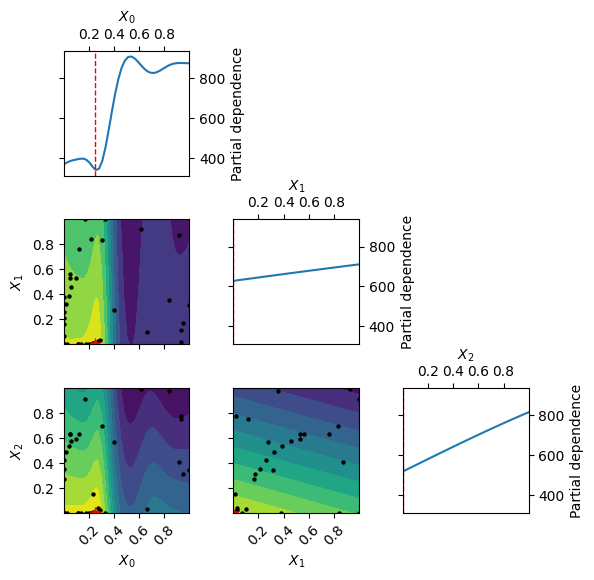

In [36]:
plot_objective(res)

## Test solution

<Axes: title={'center': 'action = [0.2521079381524335, 0.0, 0.0], rew = -69.14278501475572'}, xlabel='t'>

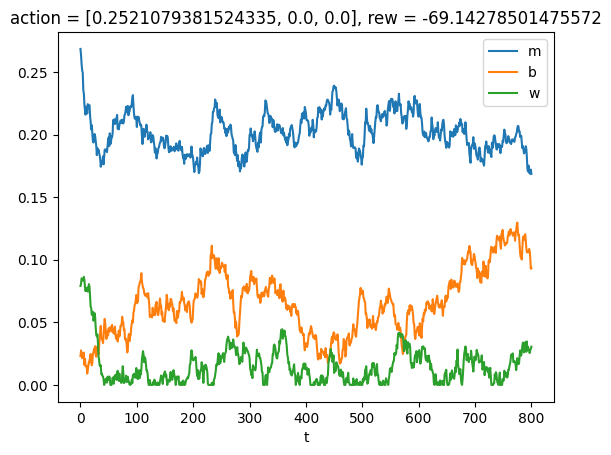

In [60]:
# CONFIG = {'sigma_M':0, 'sigma_B':0, 'sigma_W':0, }
CONFIG = {}
env = carib(config=CONFIG)

null_action = - np.ones(3, dtype=np.float32)
high_action = 0.5 * np.ones(3, dtype=np.float32)
all_wolves = np.float32([0.0, 0.5, 0.0])
all_moose = np.float32([0.5, 0.0, 0.0])
an_effort = np.float32(res.x)
# an_effort = np.float32([0.018989021076692904, 0.3169121824404405])

an_action = 2 * an_effort- 1

Ms, Bs, Ws, ts, rews = [], [], [], [], []
a_ms, a_bs = [], []

obs, _ = env.reset()
ep_rew=0
#
pop = env.population_units()
Ms.append(pop[0])
Bs.append(pop[1])
Ws.append(pop[2])
ts.append(0)
a_ms.append(env.parameters["a_M"])
a_bs.append(env.parameters["a_B"])
rews.append(ep_rew)
#
for t in range(env.Tmax):
    ts.append(t+1)
    obs, rew, term, trunc, info = env.step(an_action)
    pop = env.population_units()
    Ms.append(pop[0])
    Bs.append(pop[1])
    Ws.append(pop[2])
    a_ms.append(env.parameters["a_M"])
    a_bs.append(env.parameters["a_B"])
    ep_rew += rew
    rews.append(ep_rew)
    if term or trunc:
        break
    

ep = pd.DataFrame({
    't': ts,
    'm': Ms,
    'b': Bs,
    'w': Ws,
    'rew': rews,
    'a_M': a_ms,
    'a_B': a_bs,
})

ep.plot(x='t', y=['m', 'b', 'w'], title=f'action = {res.x}, rew = {ep_rew}')

In [26]:
# ep.plot(x='t', y=['a_B'], title=f'{ep_rew}')

manager = constAction(res.x)
gather_stats(manager, carib(config=CONFIG))

2024-05-20 18:44:22,765	INFO worker.py:1749 -- Started a local Ray instance.


(-68.40970542630504, -137.09041561089623, 0.27100475828616766)

## RL solution

In [37]:
from stable_baselines3 import PPO
from sb3_contrib import TQC

ppoAgent = PPO.load('../saved_agents/PPO-CaribouScipy', device='cpu')
tqcAgent = TQC.load('../saved_agents/TQC-CaribouScipy', device='cpu')

<Axes: title={'center': '-39.25649191800393'}, xlabel='t'>

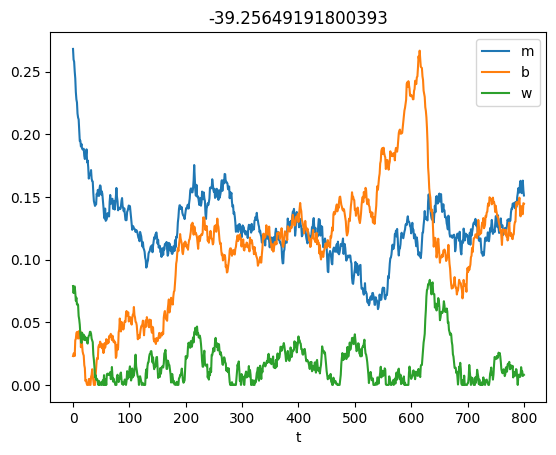

In [86]:
# CONFIG = {'sigma_M':0, 'sigma_B':0, 'sigma_W':0, }
CONFIG = {}
env = carib(config=CONFIG)

Ms, Bs, Ws, ts, rews = [], [], [], [], []
a_ms, a_bs = [], []
mculls, wculls, rests = [], [], []

obs, _ = env.reset()
ep_rew=0
#
pop = env.population_units()
Ms.append(pop[0])
Bs.append(pop[1])
Ws.append(pop[2])
ts.append(0)
a_ms.append(env.parameters["a_M"])
a_bs.append(env.parameters["a_B"])
rews.append(ep_rew)
mculls.append(0)
wculls.append(0)
rests.append(0)
#
for t in range(env.Tmax):
    action, info = ppoAgent.predict(obs)
    ts.append(t+1)
    obs, rew, term, trunc, info = env.step(action)
    pop = env.population_units()
    Ms.append(pop[0])
    Bs.append(pop[1])
    Ws.append(pop[2])
    a_ms.append(env.parameters["a_M"])
    a_bs.append(env.parameters["a_B"])
    mculls.append((action[0] + 1)/2)
    wculls.append((action[1] + 1)/2)
    rests.append((action[2] + 1)/2)
    ep_rew += rew
    rews.append(ep_rew)
    if term or trunc:
        break
    

ep = pd.DataFrame({
    't': ts,
    'm': Ms,
    'b': Bs,
    'w': Ws,
    'rew': rews,
    'a_M': a_ms,
    'a_B': a_bs,
    'mcull': mculls,
    'wcull': wculls,
    'restoration': rests,
})

ep.plot(x='t', y=['m', 'b', 'w'], title=f'{ep_rew}')

In [93]:
window = 10
ep['wcull_moving_av'] = ep['wcull'].rolling(window=window).mean()
ep['mcull_moving_av'] = ep['mcull'].rolling(window=window).mean()
ep['rest_moving_av'] = ep['restoration'].rolling(window=window).mean()

<Axes: title={'center': '-39.25649191800393'}, xlabel='t'>

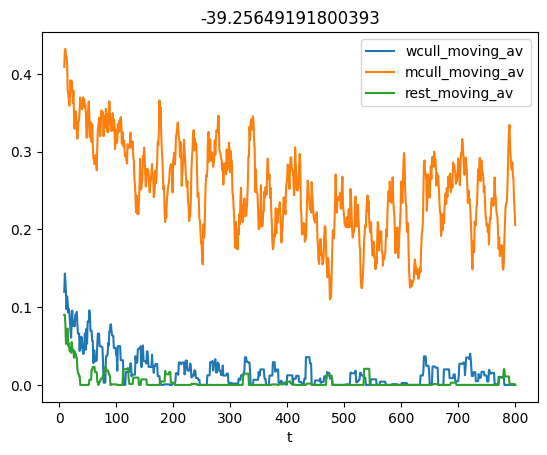

In [94]:
ep.plot(
    x='t', 
    y=['wcull_moving_av', 'mcull_moving_av', 'rest_moving_av'], 
    title=f'{ep_rew}',
)

<Axes: title={'center': '-791.6995541050107'}, xlabel='t'>

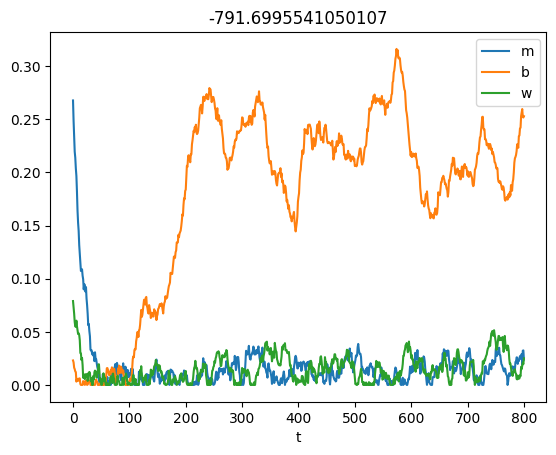

In [43]:
# CONFIG = {'sigma_M':0, 'sigma_B':0, 'sigma_W':0, }
CONFIG = {}
env = carib(config=CONFIG)

Ms, Bs, Ws, ts, rews = [], [], [], [], []
a_ms, a_bs = [], []
mculls, wculls, rests = [], [], []

obs, _ = env.reset()
ep_rew=0
#
pop = env.population_units()
Ms.append(pop[0])
Bs.append(pop[1])
Ws.append(pop[2])
ts.append(0)
a_ms.append(env.parameters["a_M"])
a_bs.append(env.parameters["a_B"])
rews.append(ep_rew)
mculls.append(0)
wculls.append(0)
rests.append(0)
#
for t in range(env.Tmax):
    action, info = tqcAgent.predict(obs)
    ts.append(t+1)
    obs, rew, term, trunc, info = env.step(action)
    pop = env.population_units()
    Ms.append(pop[0])
    Bs.append(pop[1])
    Ws.append(pop[2])
    a_ms.append(env.parameters["a_M"])
    a_bs.append(env.parameters["a_B"])
    mculls.append((action[0] + 1)/2)
    wculls.append((action[1] + 1)/2)
    rests.append((action[2] + 1)/2)
    ep_rew += rew
    rews.append(ep_rew)
    if term or trunc:
        break
    

ep = pd.DataFrame({
    't': ts,
    'm': Ms,
    'b': Bs,
    'w': Ws,
    'rew': rews,
    'a_M': a_ms,
    'a_B': a_bs,
    'mcull': mculls,
    'wcull': wculls,
    'restoration': rests,
})

ep.plot(x='t', y=['m', 'b', 'w'], title=f'{ep_rew}')

#### Uhhhh... what?

<Axes: title={'center': '-791.6995541050107'}, xlabel='t'>

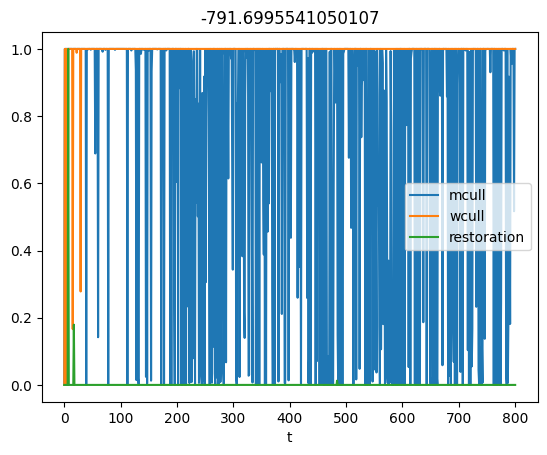

In [44]:
ep.plot(x='t', y=['mcull', 'wcull', 'restoration'], title=f'{ep_rew}')

## Reward distributions

In [53]:
caAgentRews = gather_stats(
    manager = constAction(res.x), 
    env=carib(), 
    N=300, 
    return_ep_rewards=True,
)
ppoAgentRews = gather_stats(
    manager = ppoAgent, 
    env=carib(), 
    N=300, 
    return_ep_rewards=True,
)

2024-05-20 20:49:40,491	INFO worker.py:1749 -- Started a local Ray instance.
2024-05-20 20:49:49,560	INFO worker.py:1749 -- Started a local Ray instance.


In [54]:
ca_df = pd.DataFrame({
    'rew': caAgentRews,
    'strat': 'const_action',
})
ppo_df = pd.DataFrame({
    'rew': ppoAgentRews,
    'strat': 'ppo',
})
rews_df = pd.concat([ca_df, ppo_df])
print(f"ppo: {np.mean(ppo_df.rew): .2f}, c. act.: {np.mean(ca_df.rew): .2f}")

ppo: -38.17, c. act.: -59.44


In [57]:
from plotnine import ggtitle

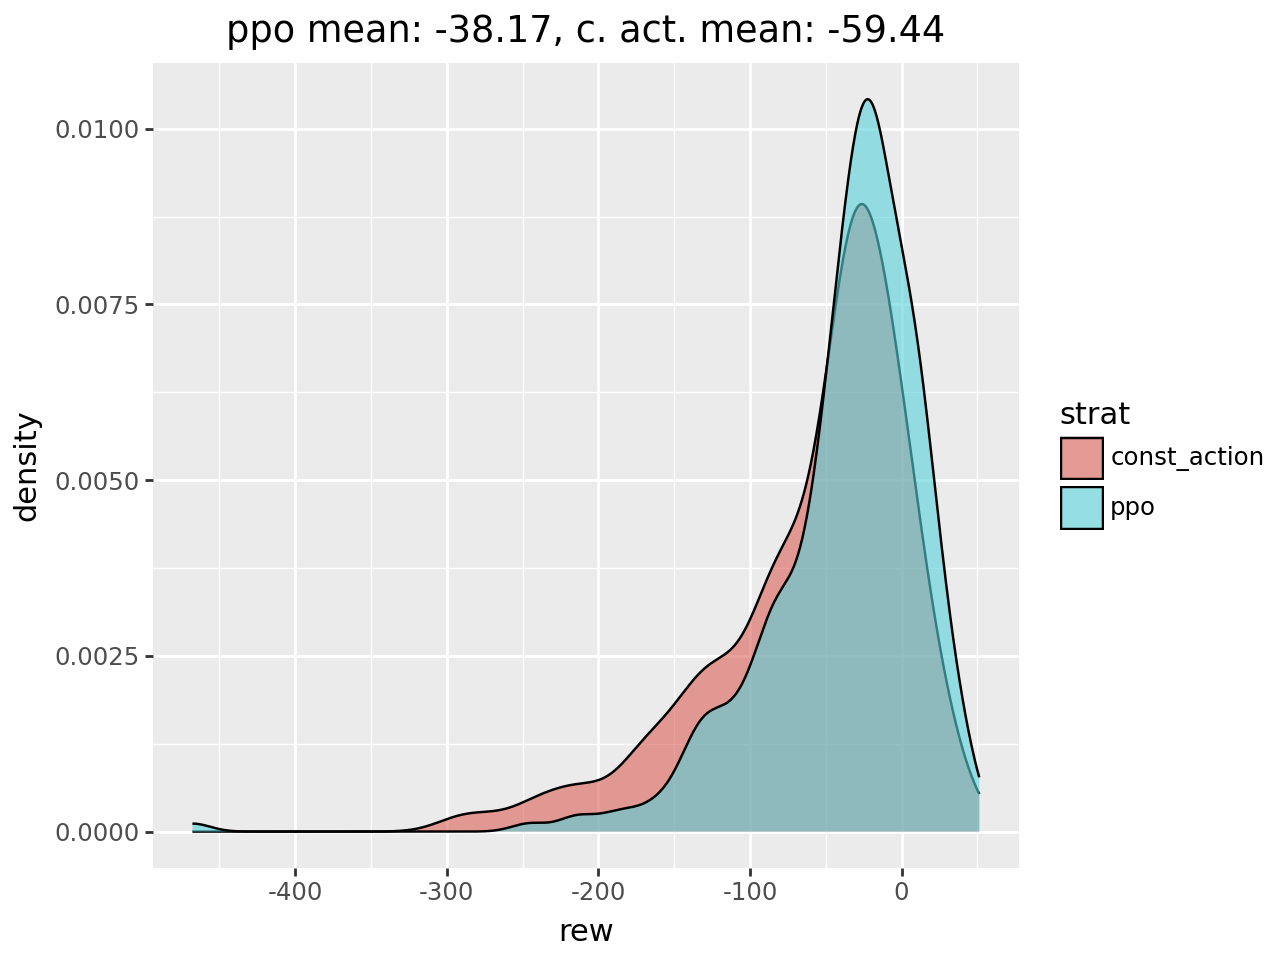

In [59]:
(
    ggplot(rews_df, aes(x='rew', fill='strat')) 
    + geom_density(alpha=0.6) 
    + ggtitle(f"ppo mean: {np.mean(ppo_df.rew): .2f}, c. act. mean: {np.mean(ca_df.rew): .2f}")
)